# Given a digit predict which digit it contains

In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
# tf.disable_v2_behavior()
# from keras.datasets import mnist


In [2]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
# from tensorflow_datasets.mnist import input_data
# from tensorflow.examples.tutorials.mnist
import input_data
# import tensorflow_datasets
# mnist=('mnist',shuffle_files=True,one_hot=True)#,as_supervised=True)#,one_hot=True)
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as: tensorflow_datasets.load('mnist')
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/_DataSet.py from tensorflow/models.


In [4]:
mnist

_Datasets(train=<input_data._DataSet object at 0x7f57def4dcd0>, validation=<input_data._DataSet object at 0x7f57df7723d0>, test=<input_data._DataSet object at 0x7f57def61690>)

In [5]:

mnist.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [6]:
# 550000 images and 
# 1 image is 28*28 flatenned for us aligned in one row
mnist.train.images.shape ,mnist.train.labels.shape

((55000, 784), (55000, 10))

In [7]:
mnist.train.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [8]:
mnist.test.images.shape,mnist.train.labels.shape

((10000, 784), (55000, 10))

In [9]:
mnist.validation.images.shape

(5000, 784)

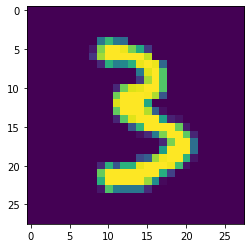

In [10]:
first_image=mnist.train.images[412]
first_image=np.array(first_image,dtype='float' )
first_image=first_image.reshape((28,28))
plt.imshow(first_image)
plt.show()

In [11]:
n_input=784
n_hidden_1=256
n_hidden_2=256
n_classes=10
# initialisation f weights and biases
weights={
    'h1':tf.Variable(tf.random_normal([n_input,n_hidden_1])),
    'h2':tf.Variable(tf.random_normal([n_hidden_1,n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_hidden_2,n_classes]))
}
biases={
    'h1':tf.Variable(tf.random_normal([n_hidden_1])),
    'h2':tf.Variable(tf.random_normal([n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_classes]))
}

In [18]:
tf.trainable_variables()

[<tf.Variable 'Variable:0' shape=(784, 256) dtype=float32_ref>,
 <tf.Variable 'Variable_1:0' shape=(256, 256) dtype=float32_ref>,
 <tf.Variable 'Variable_2:0' shape=(256, 10) dtype=float32_ref>,
 <tf.Variable 'Variable_3:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'Variable_4:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'Variable_5:0' shape=(10,) dtype=float32_ref>]

In [12]:
def forward_propagation(x,weights,biases):
    in_layer1=tf.add(tf.matmul(x,weights['h1']),biases['h1'])
    out_layer1=tf.nn.relu(in_layer1)
    
    in_layer2=tf.add(tf.matmul(out_layer1,weights['h2']),biases['h2'])
    out_layer2=tf.nn.relu(in_layer2)
    
    output=tf.add(tf.matmul(out_layer2,weights['out']),biases['out'])
    return output

In [13]:
x=tf.placeholder('float',[None,n_input])
y=tf.placeholder(tf.int32,[None,n_classes])
pred=forward_propagation(x,weights,biases)

In [14]:
cost= tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred,labels=y))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [15]:
optimizer=tf.train.AdamOptimizer(learning_rate=0.01)
optimize=optimizer.minimize(cost)

In [16]:
sess=tf.Session()
sess.run(tf.global_variables_initializer())

# Batch Gradient Descent

In [22]:
mnist.train.labels
mnist.train.images
batch_size=100
for i in range(25):
    num_batches=int(mnist.train.num_examples/batch_size)
    total_cost=0
    for j in range(num_batches):
        batch_x,batch_y=mnist.train.next_batch(batch_size)
        c,dummy=sess.run([cost,optimize],feed_dict={x:batch_x,y:batch_y})
        total_cost+=c
    print(total_cost)

12507.37661409378
3778.039317776561
2090.8605526396254
1428.6091985488044
1219.3005633180999
1103.017811108768
947.9863150948748
858.1602272741683
716.3443425478719
668.4442383089275
509.69683400888044
479.5260362732205
493.6995474739011
500.84604783938744
417.3689847154677
379.7440686031043
379.5010780427576
271.41000480608153
229.08798488633127
278.5657321586664
299.1105603248399
254.76516501115063
215.6679311380608
237.66667973224034
178.38871227844544


In [23]:
predictions=tf.argmax(pred,1)
true_labels=tf.argmax(y,1)
correct_predictions=tf.equal(predictions,true_labels)
prediction_eval,labels,correct_pred=sess.run([predictions,true_labels,correct_predictions],feed_dict={x:mnist.test.images,y:mnist.test.labels})
correct_pred.sum()

9595

We got 96% accuracy on test data